In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import LinearFusion as lf
import BackTest as bt

# import data

In [3]:
#load date 
#i identifies period, j identifies model

#train data
model_train_res=[]
for i in range(4):
    cur_model_res=[]
    for j in range(4):
        cur_model_res.append(pd.read_pickle('data/model'+str(j+1)+'/period'+str(i+1)+'/training_return_series.pkl'))
    model_train_res.append(cur_model_res)

In [4]:
#test data
model_test_res=[]
for i in range(4):
    cur_test_res=[]
    for j in range(4):
        cur_test_res.append(pd.read_pickle('data/model'+str(j+1)+'/period'+str(i+1)+'/expected_return_series.pkl'))
    model_test_res.append(cur_test_res)

In [5]:
#model's y label
true_return=pd.read_pickle('data/true_return.pkl')

In [6]:
#load daily market data
prices=pd.read_csv('data/prices.csv')
prices.trade_date=pd.to_datetime(prices.trade_date)
prices=prices.set_index(['trade_date','symbol_id'])
open=prices.open_price
close=prices.close_price

In [7]:
train1=model_train_res[0]
test1=model_test_res[0]
train2=model_train_res[1]
test2=model_test_res[1]
train3=model_train_res[2]
test3=model_test_res[2]
train4=model_train_res[3]
test4=model_test_res[3]

# 模型融合

In [8]:
#创建各period的fusion
fusion1=lf.LinearFusion(true_return,train1,test1)
fusion2=lf.LinearFusion(true_return,train2,test2)
fusion3=lf.LinearFusion(true_return,train3,test3)
fusion4=lf.LinearFusion(true_return,train4,test4)

In [9]:
#看模型相训练集关性，若想看训练集，参数换成‘test’即可
fusion1.models_corr('train')

,model1,model2,model3,model4
model1,1.000000,0.927593,0.785826,0.659720
model2,0.927593,1.000000,0.779460,0.658166
model3,0.785826,0.779460,1.000000,0.887419
model4,0.659720,0.658166,0.887419,1.000000


In [10]:
#获得四种融合模型的测试集融合输出

#period1:
na_test_pred1=fusion1.na_test_pred()
ew_test_pred1=fusion1.ew_test_pred()
ic_test_pred1=fusion1.ic_test_pred()
ir_test_pred1=fusion1.ir_test_pred()
lss_test_pred1=fusion1.lasso_test_pred()

In [11]:
#period2:
na_test_pred2=fusion2.na_test_pred()
ew_test_pred2=fusion2.ew_test_pred()
ic_test_pred2=fusion2.ic_test_pred()
ir_test_pred2=fusion2.ir_test_pred()
lss_test_pred2=fusion2.lasso_test_pred()

In [12]:
#period3:
na_test_pred3=fusion3.na_test_pred()
ew_test_pred3=fusion3.ew_test_pred()
ic_test_pred3=fusion3.ic_test_pred()
ir_test_pred3=fusion3.ir_test_pred()
lss_test_pred3=fusion3.lasso_test_pred()

In [13]:
#period4:
na_test_pred4=fusion4.na_test_pred()
ew_test_pred4=fusion4.ew_test_pred()
ic_test_pred4=fusion4.ic_test_pred()
ir_test_pred4=fusion4.ir_test_pred()
lss_test_pred4=fusion4.lasso_test_pred()

In [14]:
#test结果整合
na_test=pd.concat([na_test_pred1,na_test_pred2,na_test_pred3,na_test_pred4],axis=0)
ew_test=pd.concat([ew_test_pred1,ew_test_pred2,ew_test_pred3,ew_test_pred4],axis=0)
ic_test=pd.concat([ic_test_pred1,ic_test_pred2,ic_test_pred3,ic_test_pred4],axis=0)
ir_test=pd.concat([ir_test_pred1,ir_test_pred2,ir_test_pred3,ir_test_pred4],axis=0)
lss_test=pd.concat([lss_test_pred1,lss_test_pred2,lss_test_pred3,lss_test_pred4],axis=0)

# 回测

In [20]:
bt_na=bt.BackTest(open,close,na_test)
bt_ew=bt.BackTest(open,close,ew_test)
bt_ic=bt.BackTest(open,close,ic_test)
bt_ir=bt.BackTest(open,close,ir_test)
bt_lasso=bt.BackTest(open,close,lss_test)

In [25]:
bt_list=[bt_na,bt_ew,bt_ic,bt_ir,bt_lasso]
bt_nm_list=['Naive Average','Error Weighted','IC Weighted','IR Weighted','Lasso Weighted']

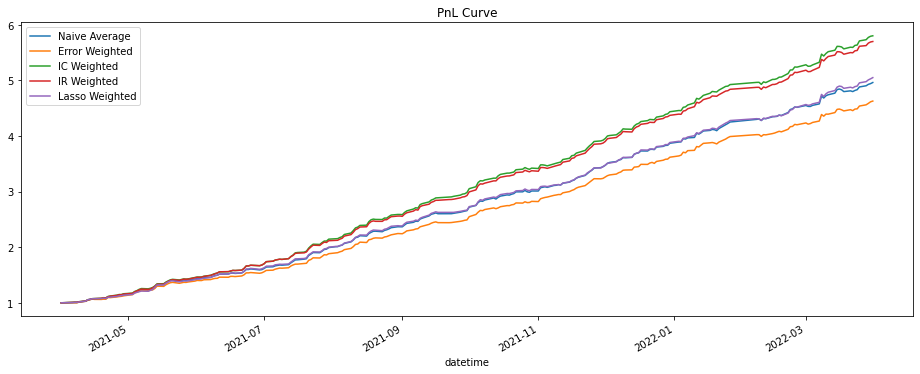

In [26]:
plt.figure(figsize=(16,6))
for i,bt in enumerate(bt_list):
    cur_pnl=bt.get_cum_rtn()
    cur_pnl.name=bt_nm_list[i]
    cur_pnl.plot()
plt.legend()
plt.title('PnL Curve')
plt.show()